In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [10]:
df=pd.read_excel('/content/Spotify_data.xlsx')
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [11]:
df=df.drop(columns=['spotify_listening_device','preffered_premium_plan','fav_music_genre','music_time_slot','music_Influencial_mood','music_lis_frequency','music_expl_method','music_recc_rating','pod_lis_frequency','fav_pod_genre','preffered_pod_format','pod_host_preference','preffered_pod_duration','pod_variety_satisfaction'])
df.head()

,Age,Gender,spotify_usage_period,spotify_subscription_plan,premium_sub_willingness,preferred_listening_content
0,20-35,Female,More than 2 years,Free (ad-supported),Yes,Podcast
1,12-20,Male,More than 2 years,Free (ad-supported),Yes,Podcast
2,35-60,Others,6 months to 1 year,Free (ad-supported),Yes,Podcast
3,20-35,Female,1 year to 2 years,Free (ad-supported),No,Music
4,20-35,Female,1 year to 2 years,Free (ad-supported),No,Music


In [12]:
stored_data=df
df=pd.get_dummies(df)
df.head()

,Age_12-20,Age_20-35,Age_35-60,Age_6-12,Age_60+,Gender_Female,Gender_Male,Gender_Others,spotify_usage_period_1 year to 2 years,spotify_usage_period_6 months to 1 year,spotify_usage_period_Less than 6 months,spotify_usage_period_More than 2 years,spotify_subscription_plan_Free (ad-supported),spotify_subscription_plan_Premium (paid subscription),premium_sub_willingness_No,premium_sub_willingness_Yes,preferred_listening_content_Music,preferred_listening_content_Podcast
0,False,True,False,False,False,True,False,False,False,False,False,True,True,False,False,True,False,True
1,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False,True
2,False,False,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,True
3,False,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False
4,False,True,False,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False


In [14]:
print(df.columns)

Index(['Age_12-20', 'Age_20-35', 'Age_35-60', 'Age_6-12', 'Age_60+',
       'Gender_Female', 'Gender_Male', 'Gender_Others',
       'spotify_usage_period_1 year to 2 years',
       'spotify_usage_period_6 months to 1 year',
       'spotify_usage_period_Less than 6 months',
       'spotify_usage_period_More than 2 years',
       'spotify_subscription_plan_Free (ad-supported)',
       'spotify_subscription_plan_Premium (paid subscription)',
       'premium_sub_willingness_No', 'premium_sub_willingness_Yes',
       'preferred_listening_content_Music',
       'preferred_listening_content_Podcast'],
      dtype='object')


# **Logic** : The Customers which are likely to pay for premium subscription are less likely to Churn so on the basis of willingness to pay for premium subscription we can decide that a customer will Churn or not.


In [34]:
premium_willingness_counts = stored_data['premium_sub_willingness'].value_counts()
print(premium_willingness_counts)

premium_sub_willingness
No     334
Yes    186
Name: count, dtype: int64


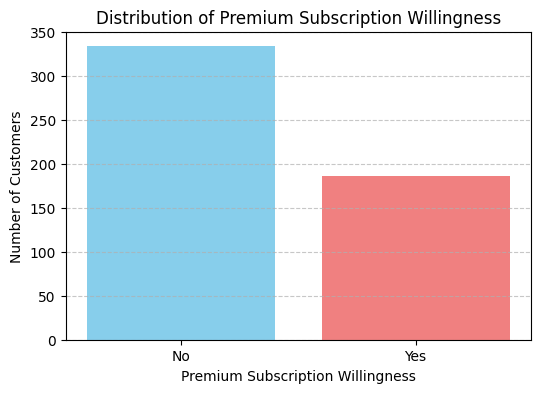

In [35]:
plt.figure(figsize=(6, 4))
plt.bar(premium_willingness_counts.index, premium_willingness_counts.values, color=['skyblue', 'lightcoral'])
plt.title('Distribution of Premium Subscription Willingness')
plt.xlabel('Premium Subscription Willingness')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [36]:
age_premium_willingness = stored_data.groupby(['Age', 'premium_sub_willingness']).size().unstack(fill_value=0)
print(age_premium_willingness)

premium_sub_willingness   No  Yes
Age                              
12-20                     36   35
20-35                    281  141
35-60                     14    9
6-12                       2    1
60+                        1    0


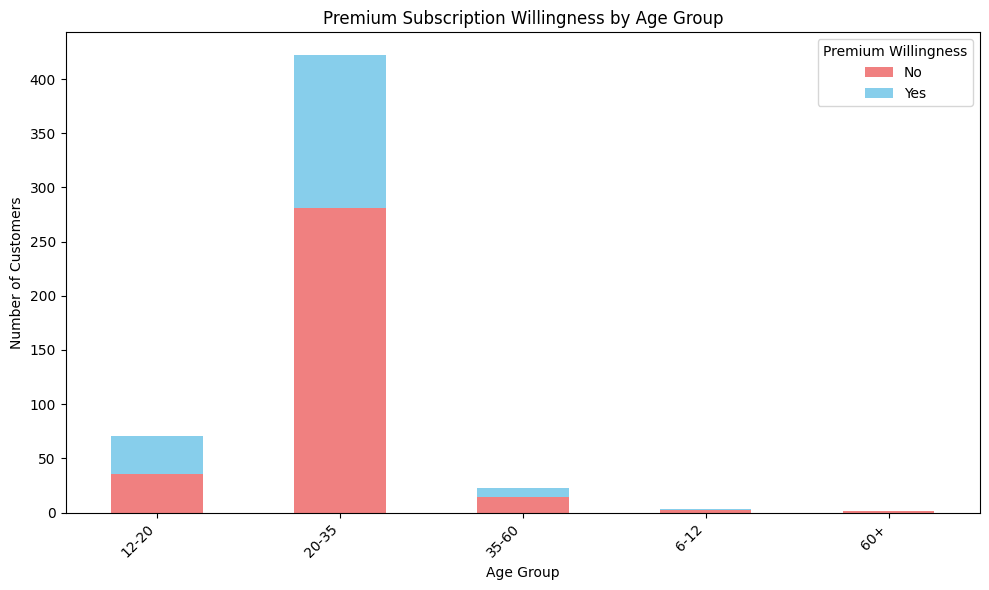

In [37]:
age_premium_willingness.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'skyblue'])
plt.title('Premium Subscription Willingness by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Premium Willingness')
plt.tight_layout()
plt.show()

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['premium_sub_willingness_No', 'premium_sub_willingness_Yes'], axis=1), df['premium_sub_willingness_Yes'], test_size=0.2, random_state=42)
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
print("My Model accuracy is:",model.score(X_test, y_test))
y_pred = model.predict(X_test)

My Model accuracy is: 0.6923076923076923


In [49]:
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))

Precision: 0.6666666666666666
Recall: 0.43902439024390244
F1 Score: 0.5294117647058824


In [55]:
model_01= RandomForestClassifier(n_estimators=220,max_depth=10,random_state=42)
model_01.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=220, random_state=42)

In [56]:
print("My Model accuracy is:",model_01.score(X_test, y_test))
y_pred = model_01.predict(X_test)

My Model accuracy is: 0.7019230769230769


In [65]:
print("Precision:",precision_score(y_train, y_pred))
print("Recall:",recall_score(y_train, y_pred))
print("F1 Score:",f1_score(y_train, y_pred))

Precision: 0.7889908256880734
Recall: 0.593103448275862
F1 Score: 0.6771653543307087


In [58]:
model_02=XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=100)
model_02.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [64]:
print("My Model accuracy is:",model_02.score(X_train, y_train))
y_pred = model_02.predict(X_train)

My Model accuracy is: 0.8028846153846154


In [66]:
print("Precision:",precision_score(y_train, y_pred))
print("Recall:",recall_score(y_train, y_pred))
print("F1 Score:",f1_score(y_train, y_pred))

Precision: 0.7889908256880734
Recall: 0.593103448275862
F1 Score: 0.6771653543307087


#so we can conclude that XGBoost is the best model as it has much higher accuracy.


In [68]:
final=stored_data.copy()
final['probability']=model_02.predict_proba(df.drop(['premium_sub_willingness_No', 'premium_sub_willingness_Yes'], axis=1))[:, 1]
final['prediction']=model_02.predict(df.drop(['premium_sub_willingness_No', 'premium_sub_willingness_Yes'], axis=1))
final.head()

,Age,Gender,spotify_usage_period,spotify_subscription_plan,premium_sub_willingness,preferred_listening_content,probability,prediction
0,20-35,Female,More than 2 years,Free (ad-supported),Yes,Podcast,0.200861,0
1,12-20,Male,More than 2 years,Free (ad-supported),Yes,Podcast,0.627575,1
2,35-60,Others,6 months to 1 year,Free (ad-supported),Yes,Podcast,0.372412,0
3,20-35,Female,1 year to 2 years,Free (ad-supported),No,Music,0.197584,0
4,20-35,Female,1 year to 2 years,Free (ad-supported),No,Music,0.197584,0


In [69]:
final.to_excel('final.xlsx', index=False)